In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/content/US_Regional_Sales_Data.csv")

In [4]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/2018,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/2018,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/2018,7/6/2018,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/2018,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [6]:
# check missing values
df.isna().sum()

,0
OrderNumber,0
Sales Channel,0
WarehouseCode,0
ProcuredDate,0
OrderDate,0
ShipDate,0
DeliveryDate,0
CurrencyCode,0
_SalesTeamID,0
_CustomerID,0


In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# cast the date columns to datetime data type
df["ProcuredDate"] = pd.to_datetime(df["ProcuredDate"], dayfirst=True)
df["OrderDate"] = pd.to_datetime(df["OrderDate"], dayfirst=True)
df["ShipDate"] = pd.to_datetime(df["ShipDate"], dayfirst=True)
df["DeliveryDate"] = pd.to_datetime(df["DeliveryDate"], dayfirst=True)

In [9]:
# cast the numerical columns of unit cost & price to the float data type
df["Unit Cost"] = df["Unit Cost"].str.strip("$").str.replace(",","").astype("float64")
df["Unit Price"] = df["Unit Price"].str.strip("$").str.replace(",","").astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Cost         7991 n

In [10]:
num_col = df.select_dtypes([int, float]).columns
num_col

Index(['_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID',
       'Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')

In [11]:
cat_col = df.select_dtypes(object).columns
cat_col

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'CurrencyCode'], dtype='object')

In [12]:
# check all values of all columns
for i in df.columns:
    print(f"Unique values of {i}:\n {df[i].unique()}\n")

Unique values of OrderNumber:
 ['SO - 000101' 'SO - 000102' 'SO - 000103' ... 'SO - 0008089'
 'SO - 0008090' 'SO - 0008091']

Unique values of Sales Channel:
 ['In-Store' 'Online' 'Distributor' 'Wholesale']

Unique values of WarehouseCode:
 ['WARE-UHY1004' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-XYS1001'
 'WARE-MKL1006' 'WARE-NBV1002']

Unique values of ProcuredDate:
 <DatetimeArray>
['2017-12-31 00:00:00', '2018-04-10 00:00:00', '2018-07-19 00:00:00',
 '2018-10-27 00:00:00', '2019-02-04 00:00:00', '2019-05-15 00:00:00',
 '2019-08-23 00:00:00', '2019-12-01 00:00:00', '2020-03-10 00:00:00',
 '2020-06-18 00:00:00', '2020-09-26 00:00:00']
Length: 11, dtype: datetime64[ns]

Unique values of OrderDate:
 <DatetimeArray>
['2018-05-31 00:00:00', '2018-06-01 00:00:00', '2018-06-02 00:00:00',
 '2018-06-03 00:00:00', '2018-06-04 00:00:00', '2018-06-05 00:00:00',
 '2018-06-06 00:00:00', '2018-06-07 00:00:00', '2018-06-08 00:00:00',
 '2018-06-09 00:00:00',
 ...
 '2020-12-21 00:00:00', '2020-12-22 00:00

In [13]:
# check numerical columns with outliers
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ProcuredDate,7991,2019-05-29 05:11:01.794518784,2017-12-31 00:00:00,2018-10-27 00:00:00,2019-05-15 00:00:00,2020-03-10 00:00:00,2020-09-26 00:00:00,NaN
OrderDate,7991,2019-09-15 11:01:09.828557312,2018-05-31 00:00:00,2019-01-16 12:00:00,2019-09-15 00:00:00,2020-05-12 00:00:00,2020-12-30 00:00:00,NaN
ShipDate,7991,2019-09-30 15:04:26.249530624,2018-06-02 00:00:00,2019-01-31 00:00:00,2019-09-30 00:00:00,2020-05-28 00:00:00,2021-01-24 00:00:00,NaN
DeliveryDate,7991,2019-10-06 03:10:06.832686592,2018-06-07 00:00:00,2019-02-06 00:00:00,2019-10-05 00:00:00,2020-06-01 00:00:00,2021-02-02 00:00:00,NaN
_SalesTeamID,7991.0,14.384307,1.0,8.0,14.0,21.0,28.0,7.986086
_CustomerID,7991.0,25.457014,1.0,13.0,25.0,38.0,50.0,14.414883
_StoreID,7991.0,183.850081,1.0,91.0,183.0,276.0,367.0,105.903946
_ProductID,7991.0,23.771743,1.0,12.0,24.0,36.0,47.0,13.526545
Order Quantity,7991.0,4.525341,1.0,3.0,5.0,7.0,8.0,2.312631
Discount Applied,7991.0,0.115649,0.05,0.05,0.08,0.15,0.4,0.085018


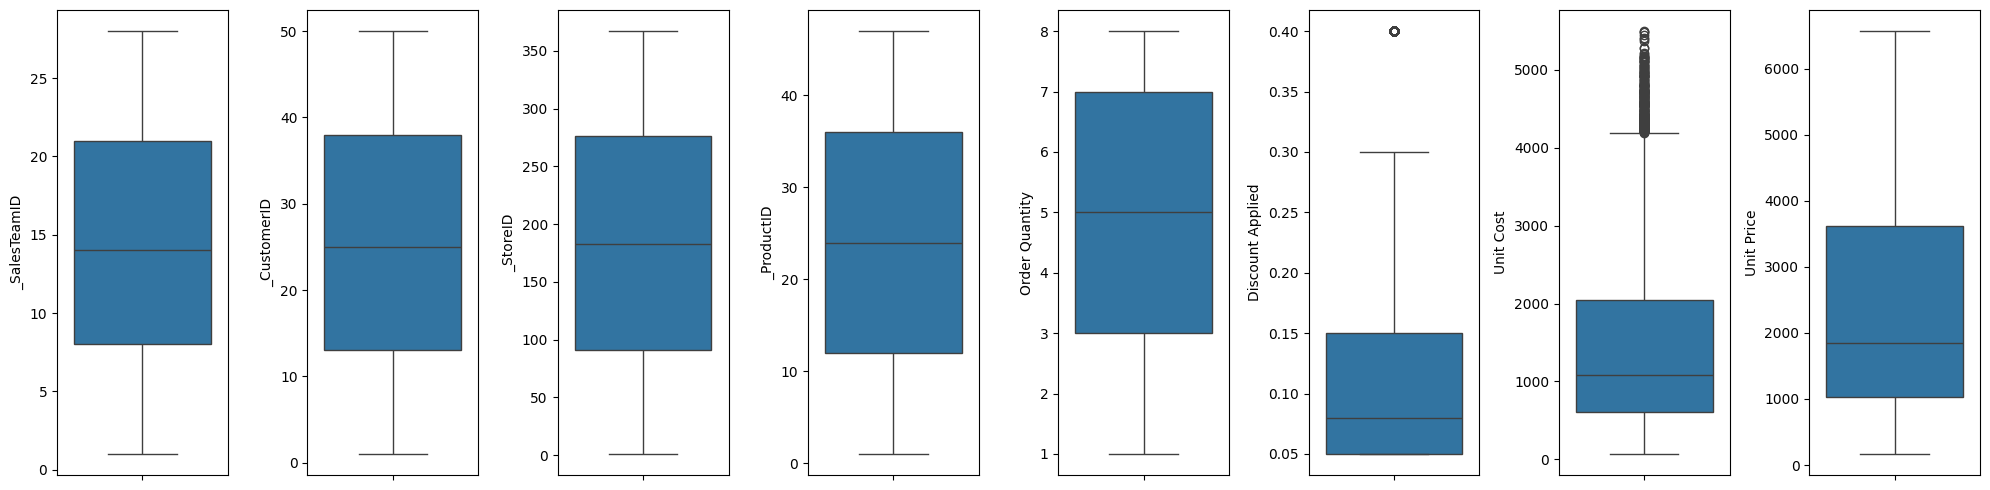

In [14]:
plt.figure(figsize=(20,5))

for i in range(0, len(num_col)):
    plt.subplot(1, len(num_col),i+1)
    sns.boxplot(y=df[num_col[i]])
    plt.tight_layout()
plt.show()

In [16]:
#check categorical columns
df[cat_col].describe().T

,count,unique,top,freq
OrderNumber,7991,7991,SO - 000101,1
Sales Channel,7991,4,In-Store,3298
WarehouseCode,7991,6,WARE-NMK1003,2505
CurrencyCode,7991,1,USD,7991


In [17]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.08,1001.18,1963.1
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.08,3348.66,3939.6
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.05,781.22,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.08,1464.69,2324.9
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.10,1476.14,1822.4


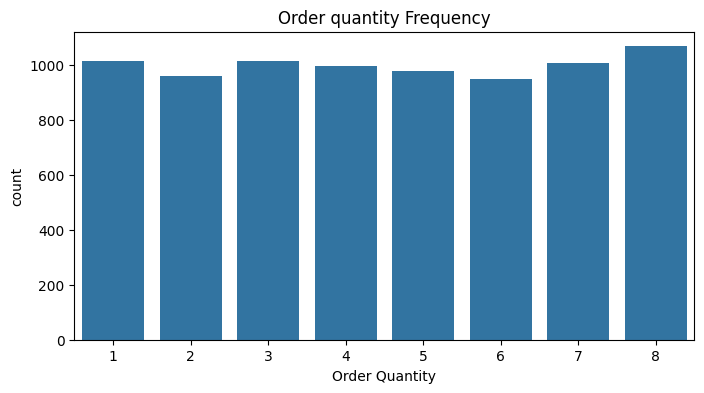

In [18]:
# visualize the order quantity distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x ="Order Quantity")
plt.title("Order quantity Frequency")
plt.show()

In [19]:
df["Revenue"] = df["Order Quantity"] * df["Unit Price"] * (1- df["Discount Applied"])
df["Revenue"]

,Revenue
0,9030.260
1,10873.296
2,1686.725
3,17111.264
4,13121.280
...,...
7986,215.740
7987,18254.820
7988,15302.800
7989,7718.400


In [20]:
df["Revenue"].min()

100.5

In [21]:
df["Revenue"].max()

49697.92

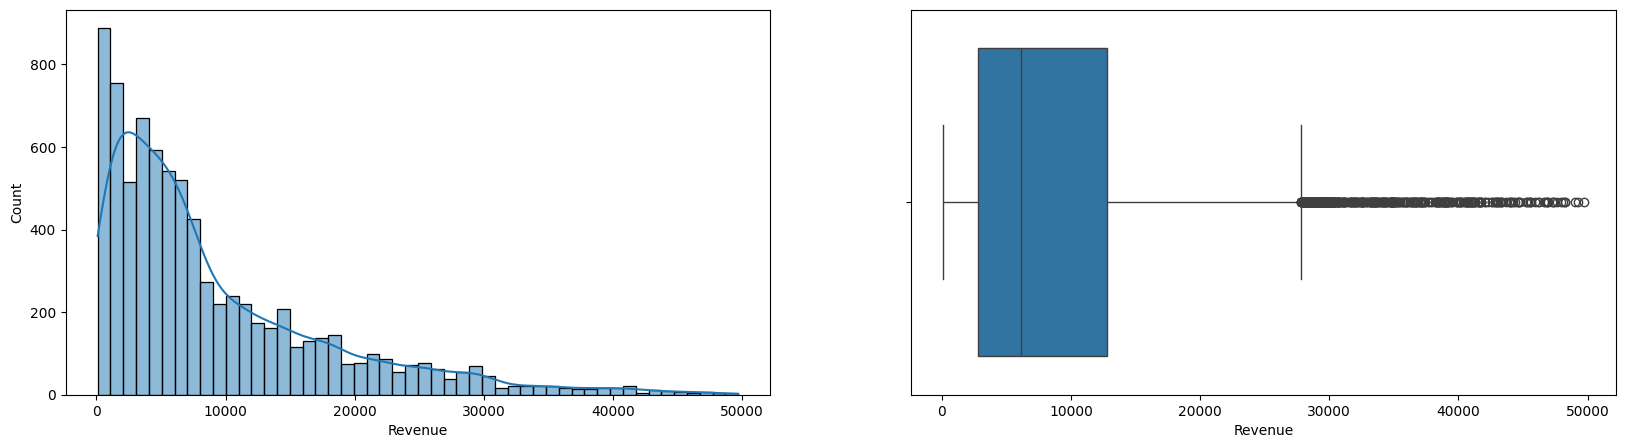

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.histplot(data=df, x="Revenue", kde=True)

plt.subplot(122)
sns.boxplot(data=df, x="Revenue")
plt.show()

In [23]:
df["StockDay"] = df["OrderDate"] - df["ProcuredDate"]

In [24]:
df["StockDay"] = df["StockDay"].dt.days

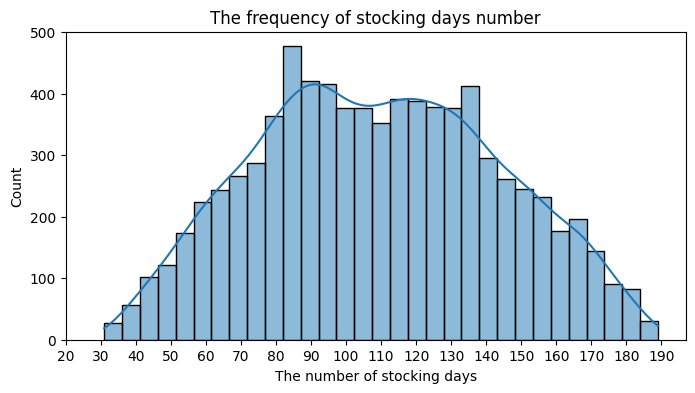

In [25]:
# visualize the distribution of stocking days number
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="StockDay", kde=True)
plt.xticks(ticks=range(20,200,10))
plt.xlabel("The number of stocking days")
plt.title("The frequency of stocking days number")
plt.show()

In [26]:
df["DeliveryDay"] = df["DeliveryDate"] - df["OrderDate"]

In [27]:
df["DeliveryDay"] = df["DeliveryDay"].dt.days

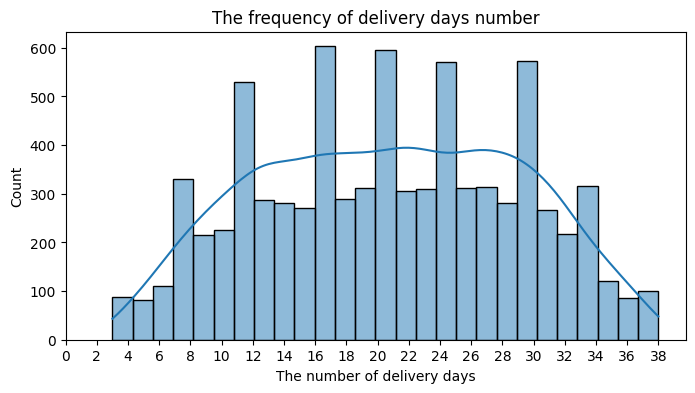

In [28]:
# visualize the distribution of delivery days number
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="DeliveryDay", kde=True)
plt.xticks(ticks=range(0,40,2))
plt.xlabel("The number of delivery days")
plt.title("The frequency of delivery days number")
plt.show()

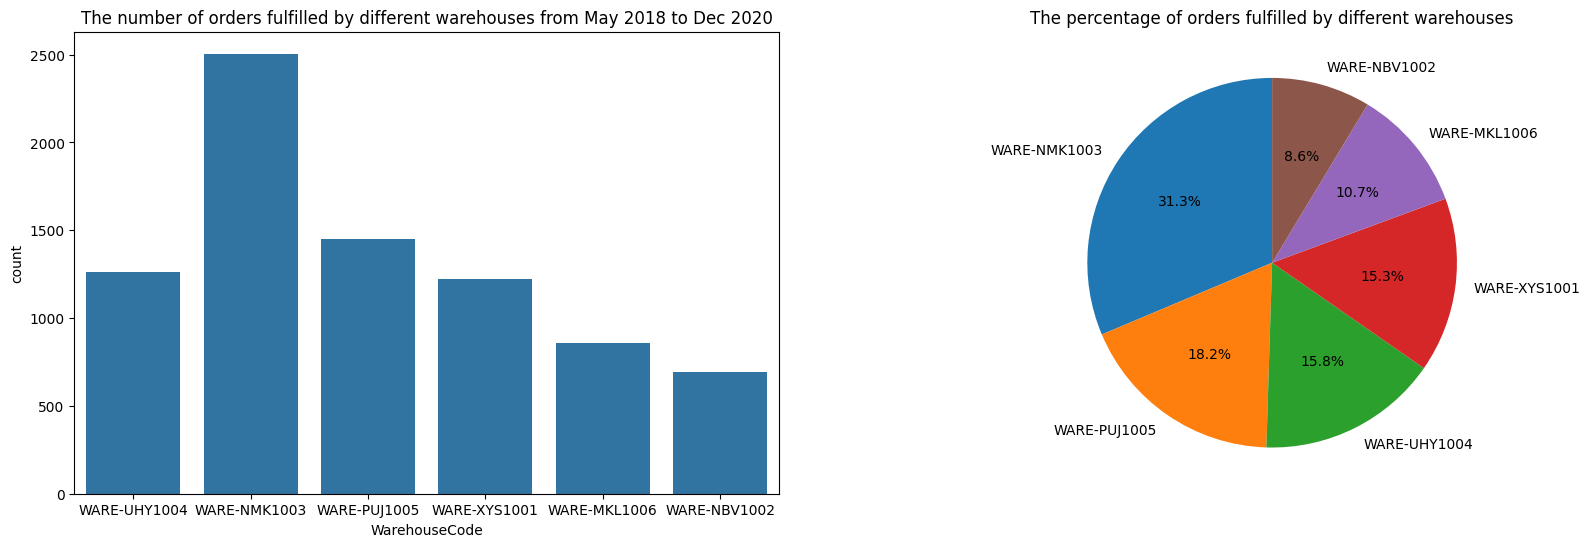

In [29]:
# visualize the warehouse with the number of orders fulfilled and its percentage
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.countplot(data=df, x="WarehouseCode", ax=ax[0])
ax[0].set_title("The number of orders fulfilled by different warehouses from May 2018 to Dec 2020")

df["WarehouseCode"].value_counts().plot.pie(autopct='%1.1f%%',startangle=90, ax=ax[1])
ax[1].set_title("The percentage of orders fulfilled by different warehouses")
ax[1].set_ylabel('')
plt.show()

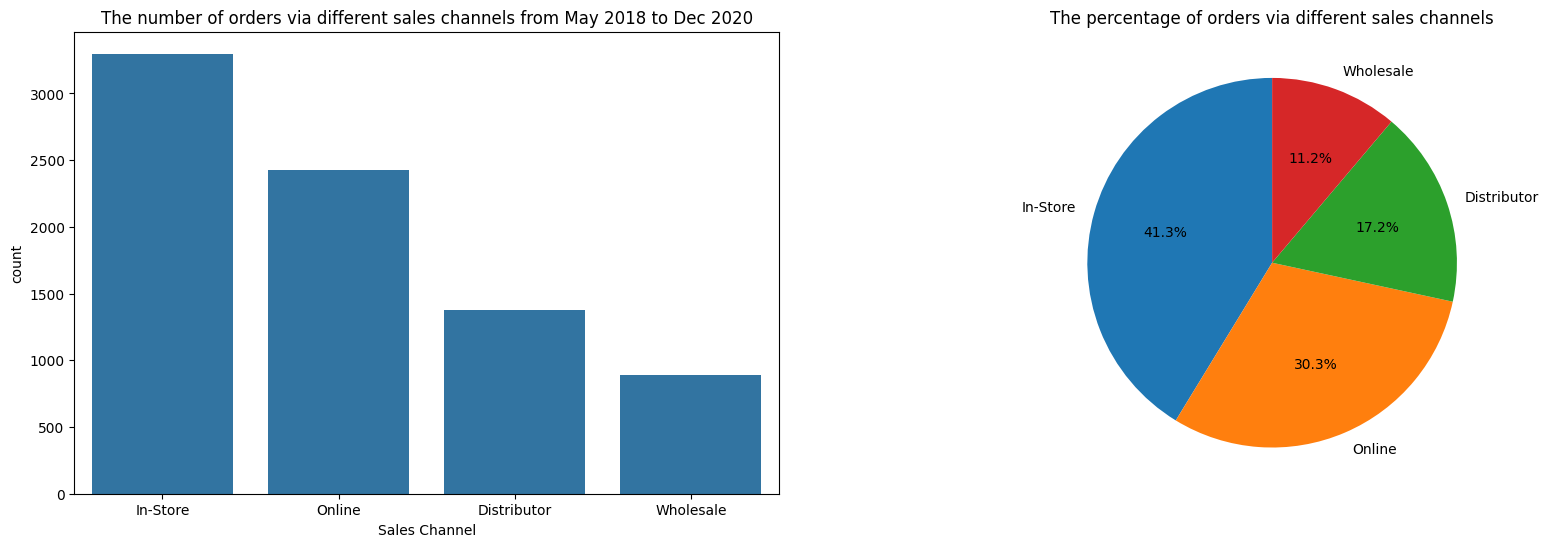

In [30]:
# visualize the sales channel with the number of slaes and its percentage
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.countplot(data=df, x="Sales Channel", ax=ax[0])
ax[0].set_title("The number of orders via different sales channels from May 2018 to Dec 2020")

df["Sales Channel"].value_counts().plot.pie(autopct='%1.1f%%',startangle=90, ax=ax[1])
ax[1].set_title("The percentage of orders via different sales channels")
ax[1].set_ylabel('')
plt.show()

In [31]:
product_revenue = df.groupby("_ProductID")["Revenue"].sum().sort_values(ascending=False).reset_index()

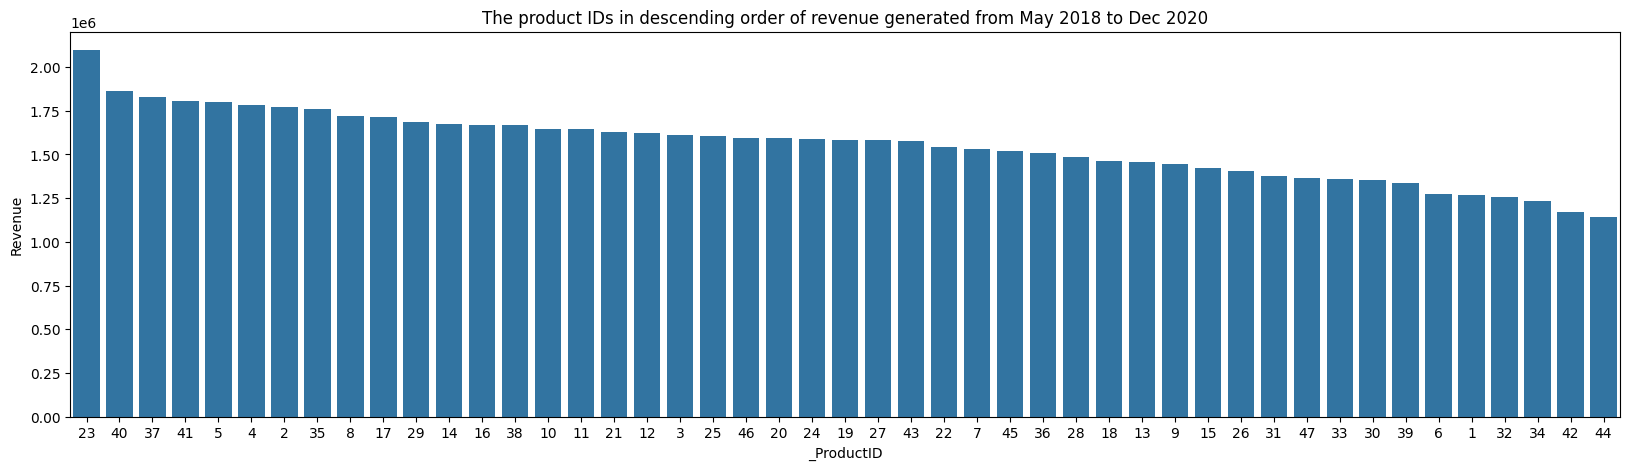

In [32]:
# visualize the product IDs in descending order of revenue respectively
plt.figure(figsize=(20,5))
sns.barplot(data=product_revenue,x="_ProductID", y="Revenue", order=product_revenue["_ProductID"])
plt.title("The product IDs in descending order of revenue generated from May 2018 to Dec 2020")
plt.show()

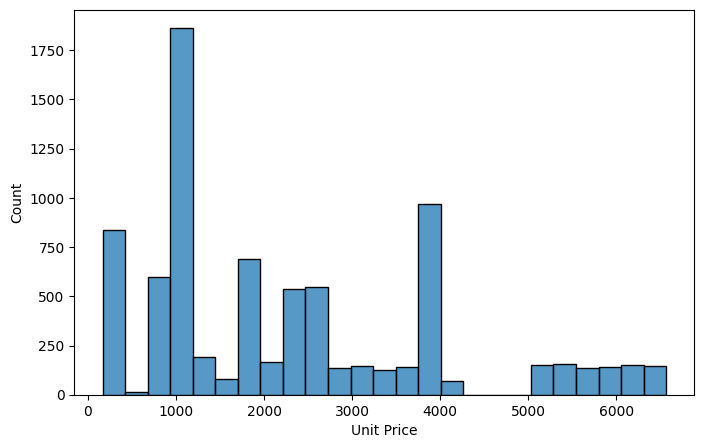

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x ="Unit Price")
plt.show()

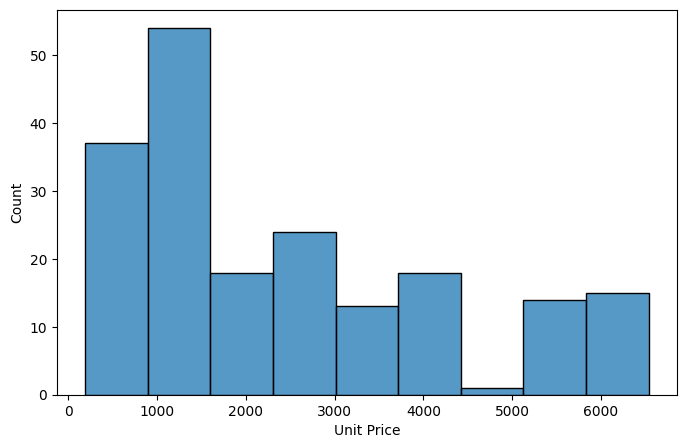

In [34]:
price_id23 = df[df["_ProductID"]==23]["Unit Price"].reset_index()
plt.figure(figsize=(8,5))
sns.histplot(data=price_id23, x ="Unit Price")
plt.show()

In [35]:
product_stockday = df.groupby("_ProductID")["StockDay"].mean().sort_values(ascending=False).reset_index()
product_stockday

,_ProductID,StockDay
0,18,113.262821
1,40,113.179348
2,35,113.154762
3,34,112.875000
4,31,112.491124
5,26,112.392405
6,37,112.375000
7,28,112.202247
8,10,112.184524
9,21,112.005952


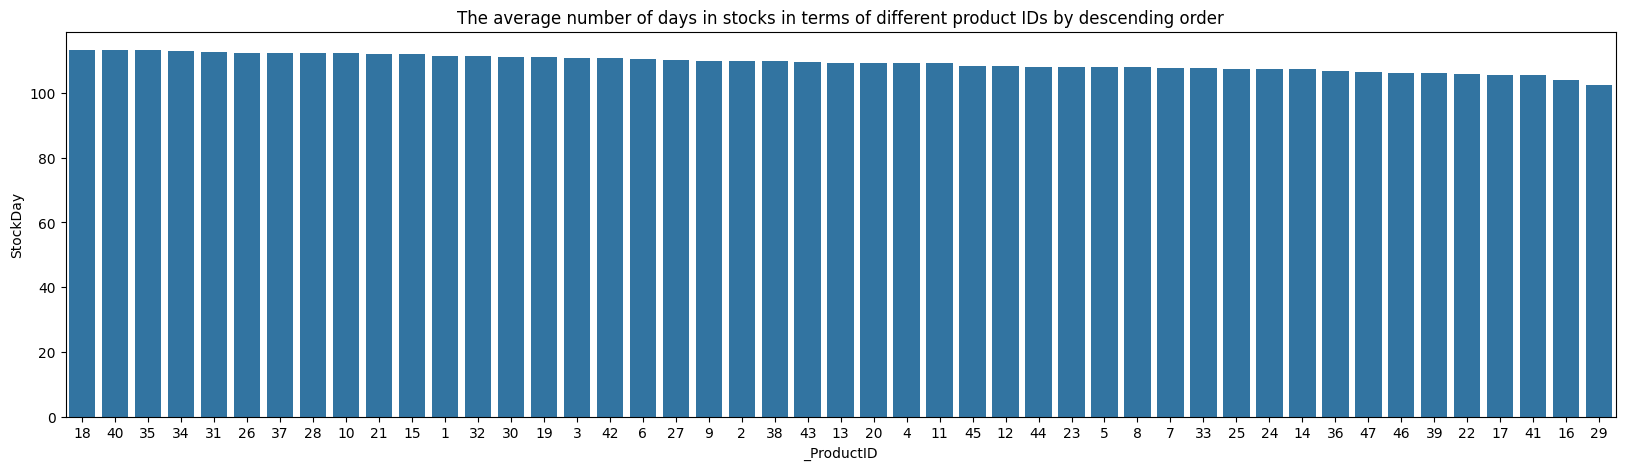

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(data=product_stockday,x="_ProductID", y="StockDay", order=product_stockday["_ProductID"])
plt.title("The average number of days in stocks in terms of different product IDs by descending order")
plt.show()

In [37]:
sales = df[["Sales Channel","OrderDate","_ProductID","Order Quantity","Discount Applied","Unit Cost","Unit Price","Revenue"]]
sales.set_index("OrderDate", inplace=True)
sales.head()

,Sales Channel,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Revenue
OrderDate,,,,,,,
2018-05-31,In-Store,12,5,0.08,1001.18,1963.1,9030.260
2018-05-31,Online,27,3,0.08,3348.66,3939.6,10873.296
2018-05-31,Distributor,16,1,0.05,781.22,1775.5,1686.725
2018-05-31,Wholesale,23,8,0.08,1464.69,2324.9,17111.264
2018-05-31,Distributor,26,8,0.10,1476.14,1822.4,13121.280


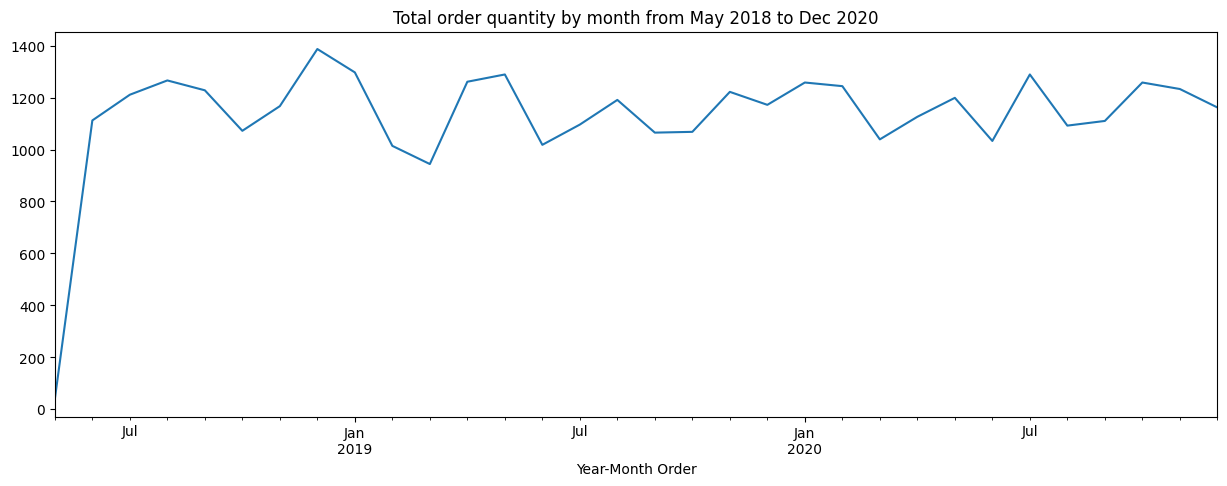

In [38]:
# visualize the total order quantity by months
sales.groupby(sales.index.to_period("M"))["Order Quantity"].sum().plot(figsize=(15,5))
plt.xlabel("Year-Month Order")
plt.title("Total order quantity by month from May 2018 to Dec 2020")
plt.show()

In [39]:
demand = pd.DataFrame(sales.groupby(sales.index.to_period("M"))["Order Quantity"].sum())
demand

,Order Quantity
OrderDate,
2018-05,39
2018-06,1112
2018-07,1211
2018-08,1266
2018-09,1228
2018-10,1072
2018-11,1167
2018-12,1387
2019-01,1297


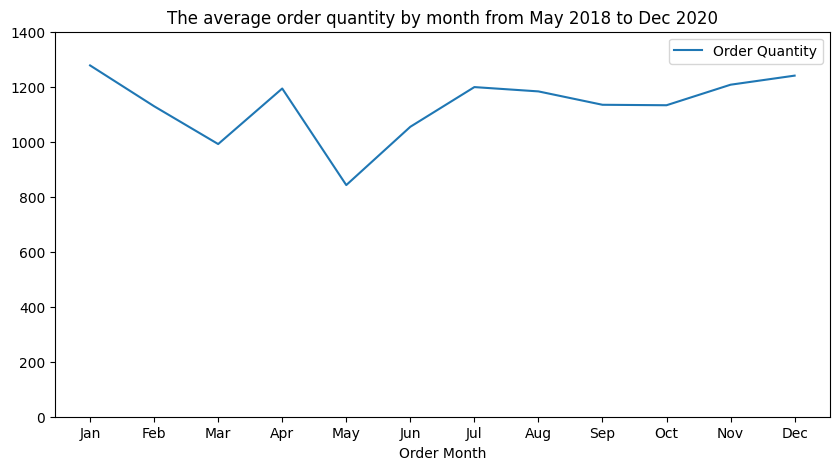

In [40]:
# visualize the average order quantity by months
demand.groupby(demand.index.month).mean().plot(figsize=(10,5))
plt.xlabel("Order Month")
plt.xticks(ticks=range(1,13,1),labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.yticks(ticks=range(0,1500,200))
plt.title("The average order quantity by month from May 2018 to Dec 2020")
plt.show()


In [41]:
# calculate the demand for each product ID every month in average
product_demand = pd.DataFrame(sales.groupby([sales.index.to_period("M"),"_ProductID"])["Order Quantity"].sum()).reset_index(level=1)
product_demand = product_demand.groupby(["_ProductID",product_demand.index.month])["Order Quantity"].mean().round().reset_index().rename(columns={"OrderDate":"OrderMonth"})
product_demand

,_ProductID,OrderMonth,Order Quantity
0,1,1,18.0
1,1,2,18.0
2,1,3,16.0
3,1,4,28.0
4,1,5,15.0
...,...,...,...
559,47,8,20.0
560,47,9,26.0
561,47,10,23.0
562,47,11,26.0


In [42]:
product_demand = pd.pivot_table(data= product_demand, index="_ProductID", columns="OrderMonth", values="Order Quantity" )
product_demand

OrderMonth,1,2,3,4,5,6,7,8,9,10,11,12
_ProductID,,,,,,,,,,,,
1,18.0,18.0,16.0,28.0,15.0,20.0,27.0,19.0,25.0,15.0,26.0,27.0
2,41.0,26.0,10.0,32.0,38.0,31.0,37.0,35.0,15.0,20.0,19.0,26.0
3,32.0,18.0,20.0,24.0,28.0,25.0,28.0,26.0,21.0,30.0,29.0,16.0
4,28.0,30.0,22.0,42.0,26.0,19.0,37.0,37.0,19.0,18.0,43.0,21.0
5,32.0,30.0,31.0,8.0,18.0,14.0,25.0,34.0,26.0,20.0,25.0,41.0
6,30.0,31.0,32.0,26.0,22.0,17.0,31.0,20.0,17.0,17.0,19.0,4.0
7,18.0,16.0,16.0,18.0,22.0,23.0,26.0,14.0,37.0,34.0,23.0,28.0
8,29.0,24.0,32.0,26.0,23.0,27.0,35.0,29.0,19.0,43.0,24.0,28.0
9,24.0,41.0,30.0,28.0,44.0,28.0,22.0,18.0,25.0,41.0,13.0,13.0


In [43]:
sales.groupby("Sales Channel").size()

,0
Sales Channel,
Distributor,1375
In-Store,3298
Online,2425
Wholesale,893


In [44]:
channel_OQ = sales.groupby("Sales Channel")["Order Quantity"].sum().reset_index()
channel_OQ

,Sales Channel,Order Quantity
0,Distributor,6287
1,In-Store,14878
2,Online,10897
3,Wholesale,4100


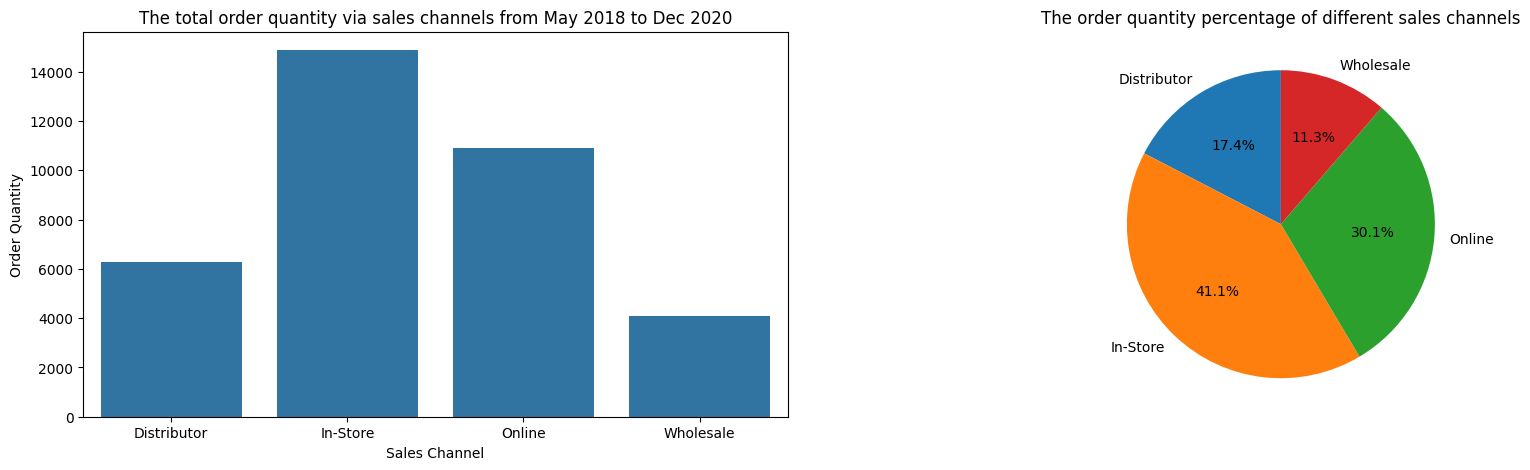

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.barplot(data=channel_OQ, x="Sales Channel", y="Order Quantity", ax=ax[0])
ax[0].set_title("The total order quantity via sales channels from May 2018 to Dec 2020")

sales.groupby("Sales Channel")["Order Quantity"].sum().plot.pie(autopct='%1.1f%%',startangle=90, ax=ax[1])
ax[1].set_title("The order quantity percentage of different sales channels")
ax[1].set_ylabel('')
plt.show()

In [46]:
channel_Re = sales.groupby("Sales Channel")["Revenue"].sum().reset_index()
channel_Re

,Sales Channel,Revenue
0,Distributor,1.314921e+07
1,In-Store,3.005902e+07
2,Online,2.166783e+07
3,Wholesale,8.160520e+06


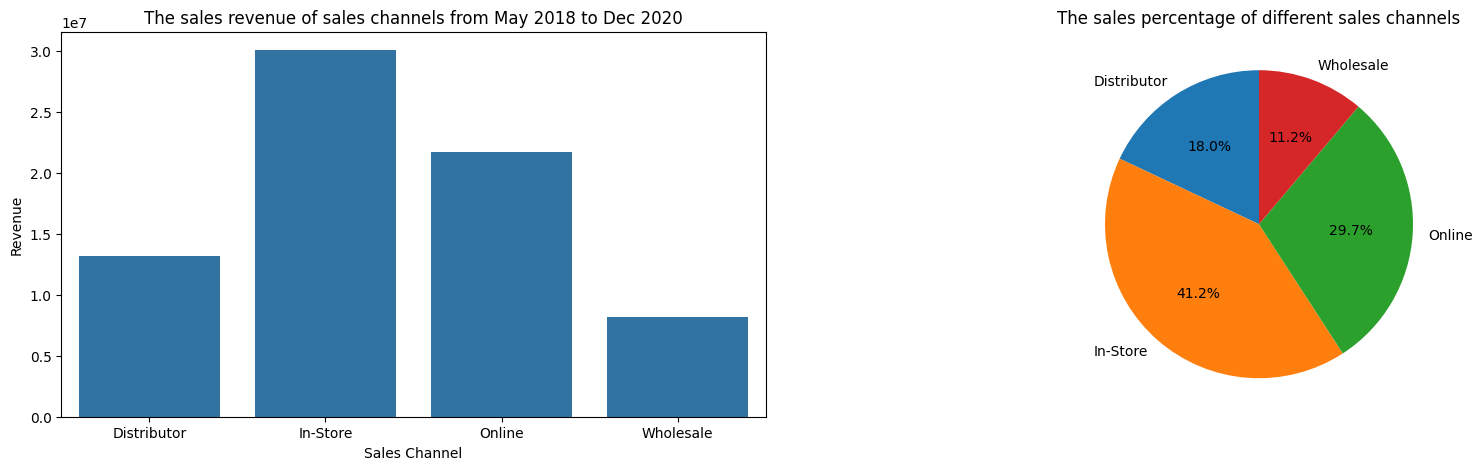

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.barplot(data=channel_Re, x="Sales Channel", y="Revenue", ax=ax[0])
ax[0].set_title("The sales revenue of sales channels from May 2018 to Dec 2020")

sales.groupby("Sales Channel")["Revenue"].sum().plot.pie(autopct='%1.1f%%',startangle=90, ax=ax[1])
ax[1].set_title("The sales percentage of different sales channels")
ax[1].set_ylabel('')
plt.show()

In [48]:
warehouse_re = df.groupby("WarehouseCode")["Revenue"].sum().reset_index()
warehouse_re

,WarehouseCode,Revenue
0,WARE-MKL1006,7.800158e+06
1,WARE-NBV1002,6.087759e+06
2,WARE-NMK1003,2.310737e+07
3,WARE-PUJ1005,1.303673e+07
4,WARE-UHY1004,1.196735e+07
5,WARE-XYS1001,1.103721e+07


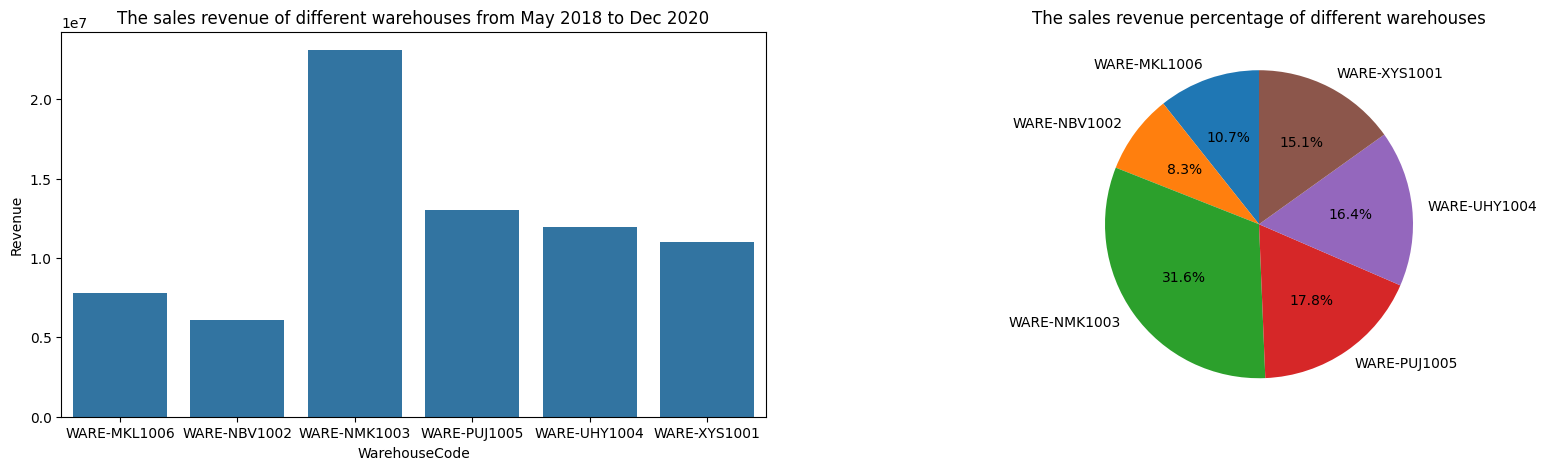

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.barplot(data=warehouse_re, x="WarehouseCode", y="Revenue", ax=ax[0])
ax[0].set_title("The sales revenue of different warehouses from May 2018 to Dec 2020")

df.groupby("WarehouseCode")["Revenue"].sum().plot.pie(autopct='%1.1f%%',startangle=90,ax=ax[1])
ax[1].set_title("The sales revenue percentage of different warehouses")
ax[1].set_ylabel('')
plt.show()

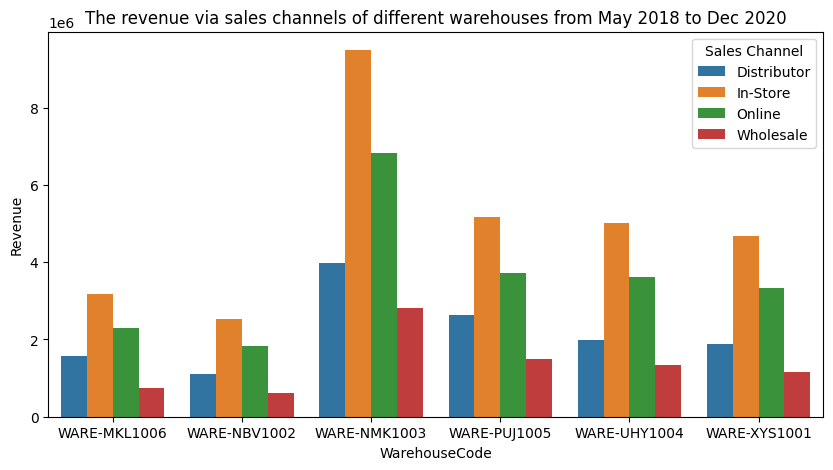

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.groupby(["WarehouseCode","Sales Channel"])["Revenue"].sum().reset_index(), x="WarehouseCode", y="Revenue", hue="Sales Channel")
plt.title("The revenue via sales channels of different warehouses from May 2018 to Dec 2020")
plt.show()

In [51]:
warehouse_stock = df.groupby("WarehouseCode")["StockDay"].mean().reset_index()
warehouse_stock

,WarehouseCode,StockDay
0,WARE-MKL1006,108.253209
1,WARE-NBV1002,109.814761
2,WARE-NMK1003,109.469860
3,WARE-PUJ1005,109.512750
4,WARE-UHY1004,108.733597
5,WARE-XYS1001,109.356792


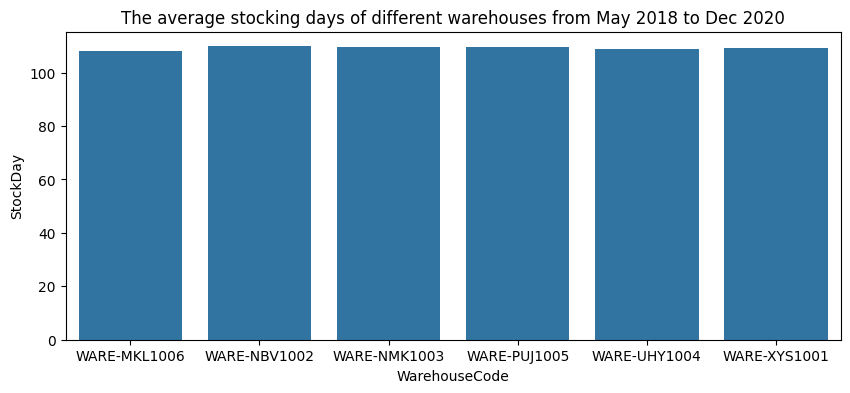

In [52]:
plt.figure(figsize=(10,4))
sns.barplot(data=warehouse_stock, x="WarehouseCode", y="StockDay")
plt.title("The average stocking days of different warehouses from May 2018 to Dec 2020")
plt.show()

In [53]:
warehouse_delivery = df.groupby("WarehouseCode")["DeliveryDay"].mean().reset_index()
warehouse_delivery

,WarehouseCode,DeliveryDay
0,WARE-MKL1006,20.304551
1,WARE-NBV1002,20.646889
2,WARE-NMK1003,20.963273
3,WARE-PUJ1005,20.555479
4,WARE-UHY1004,20.763636
5,WARE-XYS1001,20.396072


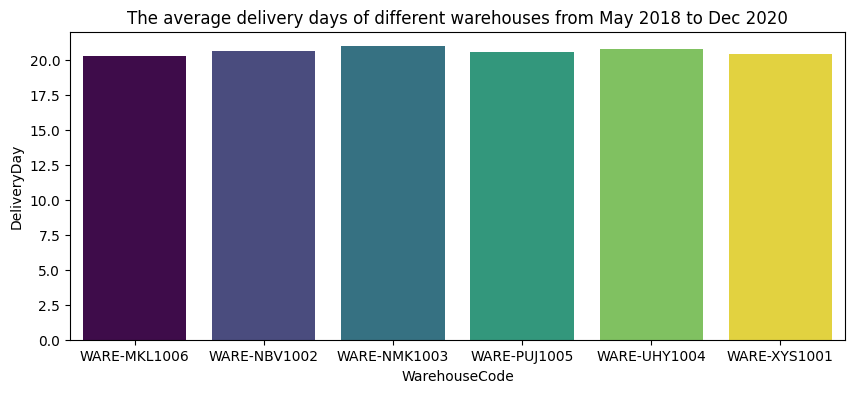

In [57]:
num_bars = len(warehouse_delivery["WarehouseCode"].unique())
colors = plt.cm.get_cmap('viridis', num_bars).colors  # Generate a colormap with num_bars distinct colors

plt.figure(figsize=(10, 4))
sns.barplot(data=warehouse_delivery, x="WarehouseCode", y="DeliveryDay", palette=colors)
plt.title("The average delivery days of different warehouses from May 2018 to Dec 2020")
plt.show()


In [58]:
product_quantity = df.groupby("_ProductID")["Order Quantity"].sum().sort_values(ascending=False).reset_index()

In [59]:
from sklearn.cluster import KMeans

In [60]:
X = product_quantity[["Order Quantity"]].values
X.shape

(47, 1)

Text(0, 0.5, 'score')

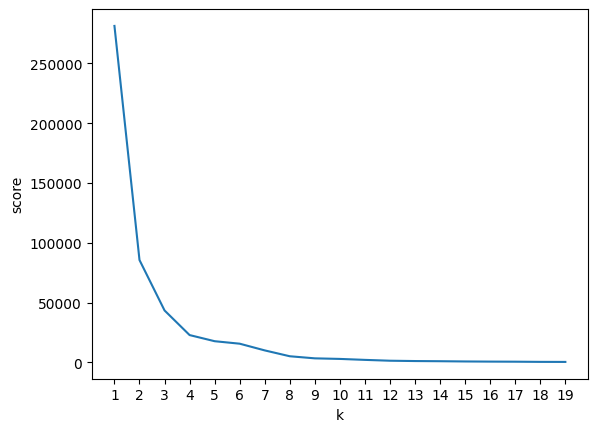

In [61]:
wcss = []
k_values = range(1,20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss)
plt.xlabel("k")
plt.xticks(range(1,20))
plt.ylabel("score")

In [62]:
kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(X)
clusters = kmean.predict(X)

In [63]:
clusters

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [64]:
product_quantity["DemandCluster"] = clusters
product_quantity

,_ProductID,Order Quantity,DemandCluster
0,23,956,2
1,37,896,2
2,8,879,2
3,4,878,2
4,40,855,2
5,41,854,2
6,22,837,0
7,38,832,0
8,27,830,0
9,12,827,0


In [65]:
product_quantity.groupby("DemandCluster")["Order Quantity"].describe()

,count,mean,std,min,25%,50%,75%,max
DemandCluster,,,,,,,,
0,28.0,792.678571,27.719566,735.0,769.75,793.5,814.75,837.0
1,13.0,665.307692,35.959201,585.0,652.00,660.0,681.00,723.0
2,6.0,886.333333,37.675810,854.0,860.75,878.5,891.75,956.0


In [66]:
#Put the right order into the cluster name in accordance with the order of average values
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new["index"] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name,"index"]],on=cluster_field_name)
    df_final = df_final.drop(columns=cluster_field_name)
    df_final= df_final.rename(columns = {"index":cluster_field_name})

    return df_final

In [67]:
product_quantity = order_cluster("DemandCluster","Order Quantity",product_quantity,True)
product_quantity

,_ProductID,Order Quantity,DemandCluster
0,23,956,2
1,37,896,2
2,8,879,2
3,4,878,2
4,40,855,2
5,41,854,2
6,22,837,1
7,38,832,1
8,27,830,1
9,12,827,1


In [68]:
X = product_revenue[["Revenue"]].values
X.shape

(47, 1)

Text(0, 0.5, 'score')

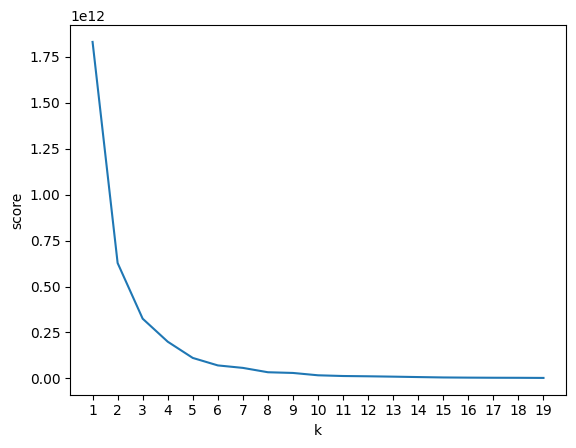

In [69]:
wcss = []
k_values = range(1,20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss)
plt.xlabel("k")
plt.xticks(range(1,20))
plt.ylabel("score")

In [70]:
kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(X)
clusters = kmean.predict(X)

In [71]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [72]:
product_revenue["RevenueCluster"]= clusters
product_revenue = order_cluster("RevenueCluster","Revenue",product_revenue,True)
product_revenue

,_ProductID,Revenue,RevenueCluster
0,23,2098372.129,2
1,40,1864573.083,2
2,37,1826946.017,2
3,41,1806892.448,2
4,5,1802729.805,2
5,4,1785844.130,2
6,2,1773113.259,2
7,35,1762855.626,2
8,8,1718053.463,1
9,17,1712109.692,1


In [73]:
sales.head()

,Sales Channel,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Revenue
OrderDate,,,,,,,
2018-05-31,In-Store,12,5,0.08,1001.18,1963.1,9030.260
2018-05-31,Online,27,3,0.08,3348.66,3939.6,10873.296
2018-05-31,Distributor,16,1,0.05,781.22,1775.5,1686.725
2018-05-31,Wholesale,23,8,0.08,1464.69,2324.9,17111.264
2018-05-31,Distributor,26,8,0.10,1476.14,1822.4,13121.280


In [74]:
# Calculate the demand variation of all product IDs
# Create the list of product ID and its coefficient of variation
l = []
for i in sales["_ProductID"].unique():
    demand = sales[sales["_ProductID"]==i].groupby(sales[sales["_ProductID"]==i].index.to_period("M"))["Order Quantity"].sum()
    cv = round(demand.std()/demand.mean()*100, 2)
    l.append([i,cv])

In [75]:
# Tranfer the data of demand variation into Data Frame for analysis
DemandVariability = pd.DataFrame(l,columns=["_ProductID","Demand Variability (%)"])
DemandVariability

,_ProductID,Demand Variability (%)
0,12,50.41
1,27,49.09
2,16,46.37
3,23,37.20
4,26,40.61
5,1,45.25
6,5,50.03
7,46,49.31
8,47,57.84
9,13,46.92


In [76]:
X = DemandVariability[["Demand Variability (%)"]].values
X.shape

(47, 1)

Text(0, 0.5, 'score')

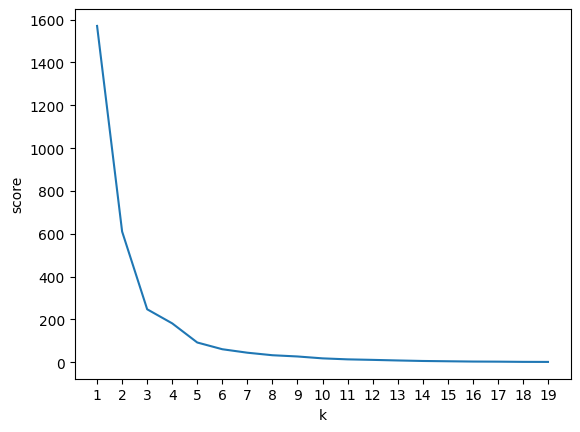

In [77]:
wcss = []
k_values = range(1,20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss)
plt.xlabel("k")
plt.xticks(range(1,20))
plt.ylabel("score")

In [78]:
kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(X)
clusters = kmean.predict(X)

In [79]:
DemandVariability["Variability Cluster"] = clusters
DemandVariability = order_cluster("Variability Cluster","Demand Variability (%)",DemandVariability,False)
DemandVariability

,_ProductID,Demand Variability (%),Variability Cluster
0,12,50.41,1
1,27,49.09,1
2,16,46.37,1
3,23,37.20,2
4,26,40.61,2
5,1,45.25,2
6,5,50.03,1
7,46,49.31,1
8,47,57.84,0
9,13,46.92,1


In [80]:
DemandVariability["Group"] = "X"
DemandVariability.loc[DemandVariability["Variability Cluster"]==1,"Group"] = "Y"
DemandVariability.loc[DemandVariability["Variability Cluster"]==0,"Group"] = "Z"
DemandVariability

,_ProductID,Demand Variability (%),Variability Cluster,Group
0,12,50.41,1,Y
1,27,49.09,1,Y
2,16,46.37,1,Y
3,23,37.20,2,X
4,26,40.61,2,X
5,1,45.25,2,X
6,5,50.03,1,Y
7,46,49.31,1,Y
8,47,57.84,0,Z
9,13,46.92,1,Y


In [81]:
DemandVariability["Group"].value_counts()

,count
Group,
Y,24
X,16
Z,7


In [82]:
# Merge the data of revenue and order quantity in the period
# Create the sales score as the criteria for ABC analysis classification
product = pd.merge(product_revenue, product_quantity, on="_ProductID")
product["Sales_score"] = product["RevenueCluster"] + product["DemandCluster"]
product

,_ProductID,Revenue,RevenueCluster,Order Quantity,DemandCluster,Sales_score
0,23,2098372.129,2,956,2,4
1,40,1864573.083,2,855,2,4
2,37,1826946.017,2,896,2,4
3,41,1806892.448,2,854,2,4
4,5,1802729.805,2,811,1,3
5,4,1785844.130,2,878,2,4
6,2,1773113.259,2,819,1,3
7,35,1762855.626,2,770,1,3
8,8,1718053.463,1,879,2,3
9,17,1712109.692,1,807,1,2


Higher sales score means higher sales and demand values and thereby higher prioritizaion of the products.

We name these scores:

0 and 1: Group C
2 and 3: Group B
4: Group A

In [83]:
product["Group"] = "A"
product.loc[product["Sales_score"]<4,"Group"] = "B"
product.loc[product["Sales_score"]<2,"Group"] = "C"

In [84]:
product["Group"].value_counts()

,count
Group,
B,26
C,16
A,5


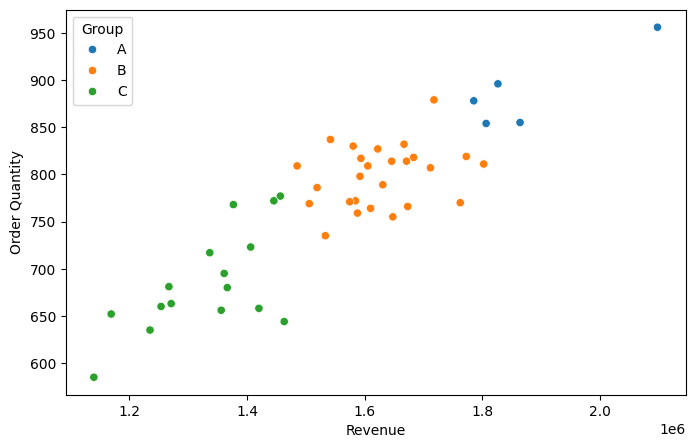

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=product, x="Revenue", y="Order Quantity", hue="Group")
plt.show()

In [87]:
# Merge the sales data with demand variation to combine ABC & XYZ analysis in the inventory control
final = product.merge(DemandVariability, on="_ProductID")
final

,_ProductID,Revenue,RevenueCluster,Order Quantity,DemandCluster,Sales_score,Group_x,Demand Variability (%),Variability Cluster,Group_y
0,23,2098372.129,2,956,2,4,A,37.20,2,X
1,40,1864573.083,2,855,2,4,A,40.10,2,X
2,37,1826946.017,2,896,2,4,A,41.25,2,X
3,41,1806892.448,2,854,2,4,A,48.33,1,Y
4,5,1802729.805,2,811,1,3,B,50.03,1,Y
5,4,1785844.130,2,878,2,4,A,44.91,2,X
6,2,1773113.259,2,819,1,3,B,51.06,1,Y
7,35,1762855.626,2,770,1,3,B,47.14,1,Y
8,8,1718053.463,1,879,2,3,B,39.96,2,X
9,17,1712109.692,1,807,1,2,B,50.67,1,Y


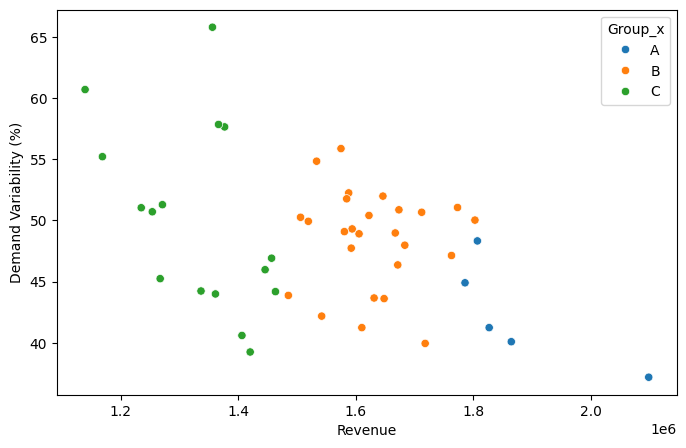

In [88]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=final, x="Revenue", y="Demand Variability (%)", hue="Group_x")
plt.show()

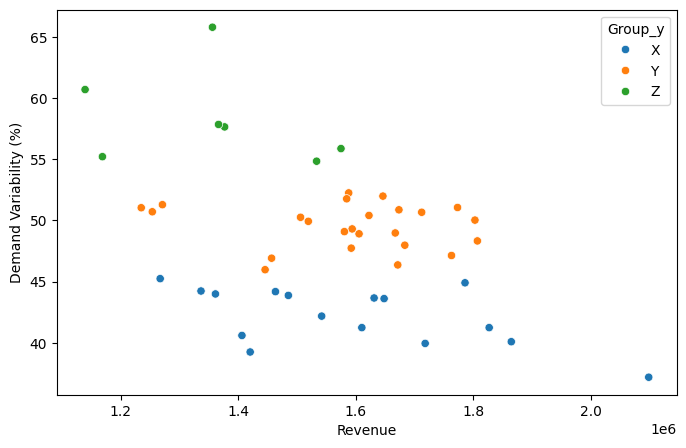

In [89]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=final, x="Revenue", y="Demand Variability (%)", hue="Group_y")
plt.show()